In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns


In [115]:
conda install -c conda-forge/label/gcc7 missingno


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [116]:
conda install -c plotly plotly_express


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [117]:
import missingno as msno


In [118]:
netflix = pd.read_csv('netflix_titles.csv')

In [119]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [120]:
netflix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [121]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [122]:
netflix.shape

(7787, 12)

In [123]:
netflix.duplicated().sum()

0

In [124]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [125]:
# msno.matrix(netflix)

In [126]:
netflix.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [127]:
netflix.rating.value_counts()


TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [128]:
netflix.shape

(7787, 12)

## make copy and clean 


In [641]:
nf=netflix.copy()


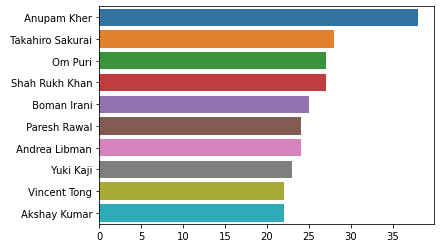

In [642]:
directors=[]
for i in range(nf["cast"].shape[0]):
    d=str(nf["cast"][i]).split(",")
    directors+=d
top_directors=pd.Series(directors)
x=top_directors.value_counts().head(11)[1:11]
ax=sns.barplot(x=x,y=x.index)


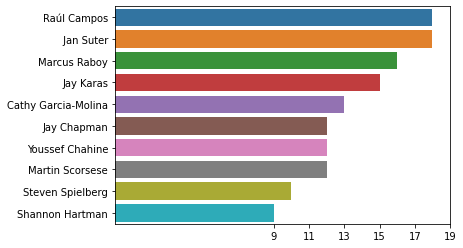

In [643]:
directors=[]
for i in range(nf["director"].shape[0]):
    d=str(nf["director"][i]).split(",")
    directors+=d
top_directors=pd.Series(directors)
x=top_directors.value_counts().head(11)[1:11]
ax=sns.barplot(x=x,y=x.index)
plt.xticks(np.arange(min(x), max(x)+2,2))
plt.show()


In [644]:
nf=nf[nf["date_added"].notna()]
# nf=nf.loc[~nf['date_added'].isnull()]


In [645]:
nf.country=nf.country.replace(np.nan,'international')

In [646]:
# colum=['cast','director']
nf['cast']=nf['cast'].fillna(nf['cast'].mode()[0])


In [647]:
# nf.dropna(subset=['rating'],inplace=True)


In [648]:
# check the data 
nf.isnull().sum()

show_id            0
type               0
title              0
director        2379
cast               0
country            0
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [649]:
new_rat={'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

nf['rating']=nf['rating'].replace(new_rat)
    

## change date_added to date time

In [650]:
nf['date_added']= pd.to_datetime(nf['date_added'])
nf['date_added']= nf['date_added'].dt.strftime('%m/%d/%Y')


In [685]:
nf['release_year']=pd.to_datetime(nf['release_year'])


## cahange type to category


In [652]:
nf['type']=nf['type'].astype('category')

## split cast name 

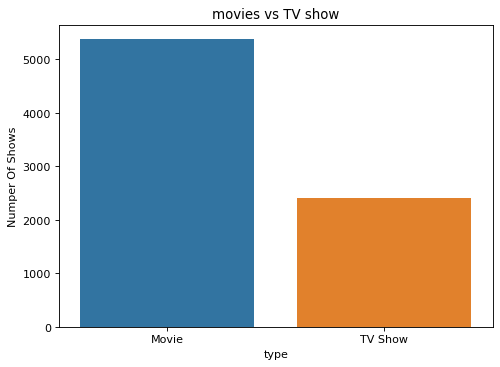

In [653]:
plt.figure(figsize=(7,5), dpi=80)
sns.countplot(x='type',data=nf)
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("movies vs TV show")
plt.ylabel("Numper Of Shows")
plt.show()

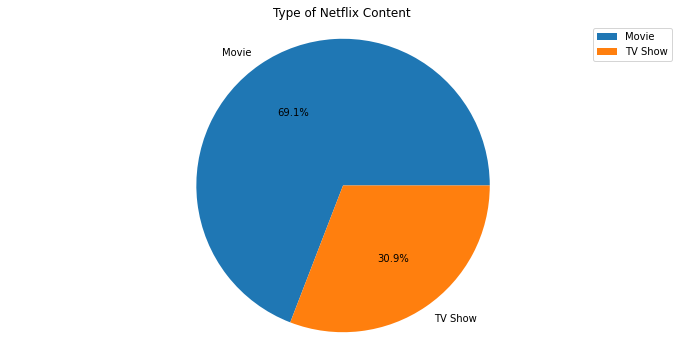

In [654]:
plt.figure(figsize=(12, 6))
labels=['Movie', 'TV Show']
size=nf['type'].value_counts()
plt.pie(size,labels=labels,
        autopct='%2.1f%%')
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.legend()
plt.show()


Text(0, 0.5, 'Numper Of Shows')

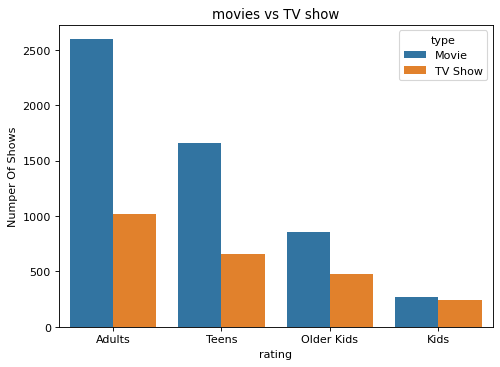

In [655]:
plt.figure(figsize=(7,5), dpi=80)
ax=sns.countplot(x='rating',data=nf,hue='type')
plt.xticks(horizontalalignment="center")
plt.title("movies vs TV show")
plt.ylabel("Numper Of Shows")


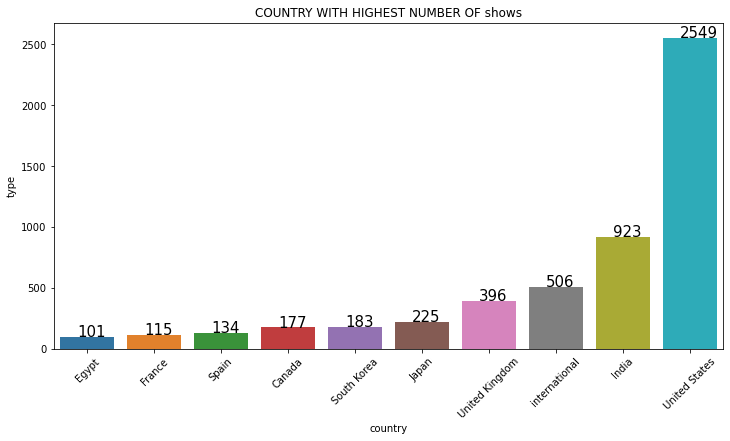

In [656]:
countries = pd.crosstab(nf["country"],["type"]).sort_values(by = 'type',ascending=True )[-10:].reset_index()
# x=country_count.head(7).plot(kind="bar")
# countries=pd.crosstab(nf["country"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
plt.figure(figsize=(12,6))
ax=sns.barplot(x=countries["country"],y=countries["type"] )

plt.xticks(rotation=45)
# plt.legend(labels='type')
plt.title("COUNTRY WITH HIGHEST NUMBER OF shows")
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')
plt.show()

In [657]:
nf['date_added']=pd.to_datetime(nf['date_added'])
nf['add_year']=nf['date_added'].dt.year
nf['add_year']

0       2020
1       2016
2       2018
3       2017
4       2020
        ... 
7782    2020
7783    2019
7784    2020
7785    2020
7786    2020
Name: add_year, Length: 7777, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


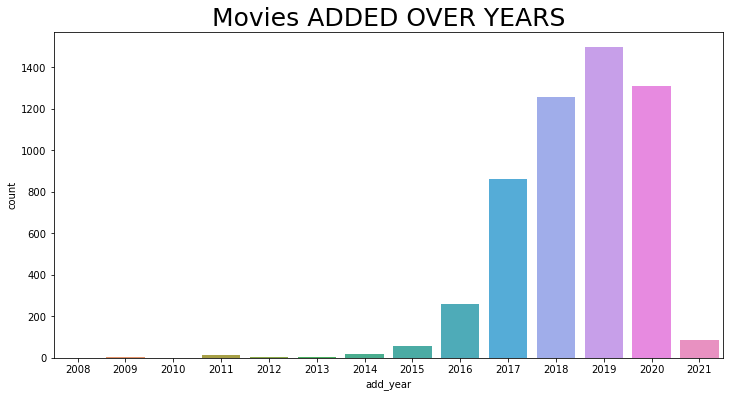

In [658]:
T=nf[nf["type"]=="Movie"]
plt.figure(figsize=(12,6))
sns.countplot(T["add_year"])
plt.title("Movies ADDED OVER YEARS",fontsize=25)
plt.show()

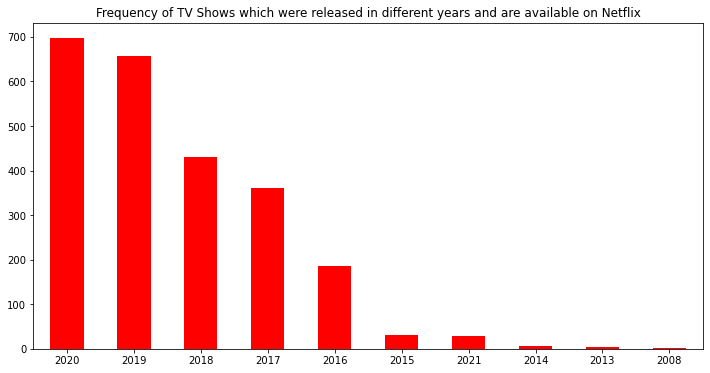

In [683]:
plt.figure(figsize=(12,6))
nf[nf["type"]=="TV Show"]["add_year"].value_counts()[:10].plot(kind="bar",color="Red")
plt.title("Frequency of TV Shows which were released in different years and are available on Netflix")
plt.xticks(rotation=0)
plt.show()


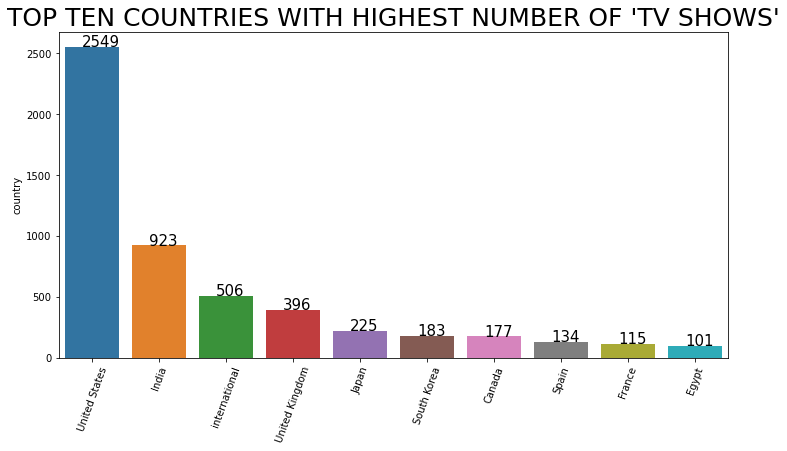

In [661]:
m=nf[nf["type"]=='TV Show']
movies=nf["country"].value_counts().head(10)
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF 'TV SHOWS'",fontsize=25)
ax=sns.barplot(x=movies.index,y=movies)
plt.xticks(rotation =70)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')


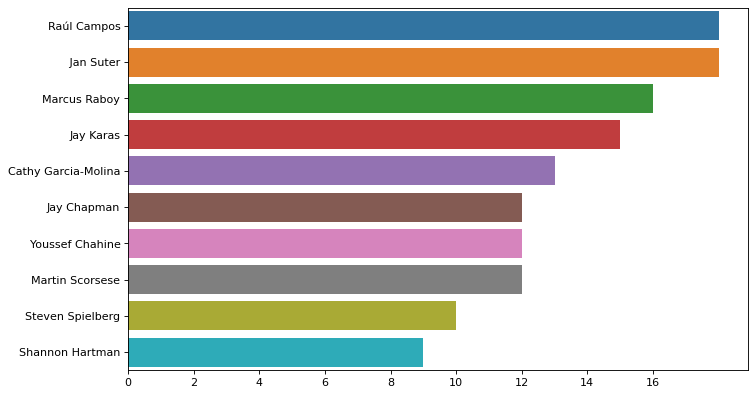

In [675]:
directors=[]
for i in range(netflix["director"].shape[0]):
    d=str(netflix["director"][i]).split(",")
    directors+=d
top_directors=pd.Series(directors)
x=top_directors.value_counts(dropna=True).head(11)[1:11]
plt.figure(figsize=(10,6),dpi=80)
ax=sns.barplot(x=x,y=x.index)
plt.xticks(np.arange(0,max(x),2))
plt.show()
